# Tutorial 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import special, stats
from math import sqrt
from statistics import mean, variance, stdev

Q1:

In [2]:
y_N = 1601
y_S = 510
n_N = 162527 + y_N
n_S = 412368 + y_S

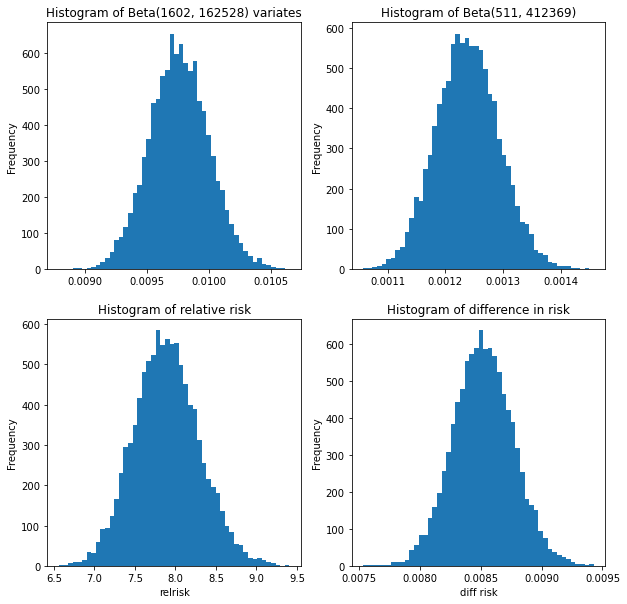

In [3]:
fig, ax  = plt.subplots(2,2, figsize=(10,10))

num_variates = 10000

beta_1602_162528_variates = stats.beta.rvs(y_N+1, n_N-y_N+1, size=num_variates)
beta_511_412369_variates = stats.beta.rvs(y_S+1, n_S-y_S+1, size=num_variates)
relrisk = beta_1602_162528_variates / beta_511_412369_variates
diffrisk = beta_1602_162528_variates - beta_511_412369_variates

ax[0][0].hist(beta_1602_162528_variates, bins=50)
ax[0][0].set_title("Histogram of Beta(1602, 162528) variates")
ax[0][0].set_ylabel("Frequency")

ax[0][1].hist(beta_511_412369_variates, bins=50)
ax[0][1].set_title("Histogram of Beta(511, 412369)")
ax[0][1].set_ylabel("Frequency")

ax[1][0].hist(relrisk, bins=50)
ax[1][0].set_title("Histogram of relative risk")
ax[1][0].set_xlabel("relrisk")
ax[1][0].set_ylabel("Frequency")

ax[1][1].hist(diffrisk, bins=50)
ax[1][1].set_title("Histogram of difference in risk")
ax[1][1].set_xlabel("diff risk")
ax[1][1].set_ylabel("Frequency")

plt.show()

95% confidence interval of `relrisk`

In [4]:
np.quantile(relrisk, [.025, .975])

array([7.12594152, 8.71079732])

Estimate of the posterior probability that the difference in risks exceeds 0

In [5]:
sum(diffrisk > 0) / len(diffrisk)

1.0

Q2: The posterior distribution is

\begin{align*}
    p(\theta, \sigma^{2} | \boldsymbol{y})
            &=p(\theta | \sigma^{2}, \boldsymbol{y}) p(\sigma^{2} | \boldsymbol{y})
\end{align*}
where $\theta | \sigma^{2}, \boldsymbol{y}\sim \mathrm{N}\left(\mu_{1}, \dfrac{\sigma^{2}}{n_{1}}\right)$
and $\sigma^{2}| \boldsymbol{y} \sim \operatorname{lnv-Gamma}\left(\dfrac{\nu_{1}}{2}, \dfrac{\nu_{1} \sigma_{1}^{2}}{2}\right)$;

- $\mu_{1}
    =\dfrac{n \bar{y}+n_{0} \mu_{0}}{n+n_{0}}$
- $n_{1}
    =n+n_{0}$
- $\nu_{1}
    =\nu_{0}+n$
- $\sigma_{1}^{2}
    =\dfrac{1}{\nu_{1}}\left[\nu_{0} \sigma_{0}^{2}+(n-1) s^{2}+\dfrac{n n_{0}\left(\bar{y}-\mu_{0}\right)^{2}}{n+n_{0}}\right]$
- $s^2=\dfrac{1}{n-1} \sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}$ is the sample variance of $\boldsymbol{y}$.
    
It is given that $\mu_0=5, n_0=1, \nu_0=2, S_0:=\nu_0\sigma_0^2=8$.

In [6]:
school1 = pd.read_table("datasets/school1.txt", sep="\n", header=None, names=["data"])
school2 = pd.read_table("datasets/school2.txt", sep="\n", header=None, names=["data"])
school3 = pd.read_table("datasets/school3.txt", sep="\n", header=None, names=["data"])

school1_data = list(school1.data)
school2_data = list(school2.data)
school3_data = list(school3.data)

In [7]:
mu_0 = 5
n_0 = 1
nu_0 = 2
S_0 = 8

NUM_VARIATES = 10000

A random variable $X$ follows the **inverse-gamma distribution** with shape parameter $a$ and scale parameter $b$, denoted by $X \sim$ Inv-Gamma$(a, b)$, if $X$ has the pdf
    \begin{align*}
        p(x)=\frac{b^{a}}{\Gamma(a)}x^{-a-1} \exp \left(-\frac{b}{x}\right) \text { for } x>0
    \end{align*}
    
- The inverse-gamma pdf in `scipy` is a bit different from the above. [`scipy.stats.invgamma(x,a)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.invgamma.html) is essentially Inv-Gamma$(a, 1)$
    \begin{align*}
        f(x, a)=\frac{x^{-a-1}}{\Gamma(a)} \exp \left(-\frac{1}{x}\right)
    \end{align*}
    
- Instead of generating from Inv-Gamma$(a,b)$ directly, generate from $X\sim$ Gamma$(a,b)$ and take $1/X$.

In [8]:
def posterior_q2(y, num_variates):
    n = len(y)
    mu_1 = (n*mean(y) + n_0*mu_0) / (n + n_0)
    n_1 = n + n_0
    nu_1 = nu_0 + n
    S_1 = (S_0 + (n-1)*variance(y) + (n*n_0*(mean(y)-mu_0)**2)/(n+n_0))
    
    temp = np.random.gamma(nu_1/2, 2/S_1, size=num_variates)
    
    sigma = [sqrt(1 / x) for x in temp] 
    
    return stats.norm.rvs(loc=mu_1, scale=sigma, size=num_variates), sigma

In [9]:
theta_1, sigma_1 = posterior_q2(school1_data, NUM_VARIATES)
theta_2, sigma_2 = posterior_q2(school2_data, NUM_VARIATES)
theta_3, sigma_3 = posterior_q2(school3_data, NUM_VARIATES)

Q2a: Posterior means for $\theta$

In [10]:
mean(theta_1), mean(theta_2), mean(theta_3)

(9.331225567093615, 6.853561373223161, 7.755357963799282)

Q2a: Posterior means for $\sigma$

In [11]:
mean(sigma_1), mean(sigma_2), mean(sigma_3)

(3.895724361414725, 4.389347895455766, 3.750176526776111)

Q2b:

\begin{align*}
    P(\theta_3 < \theta_2 < \theta_1)
        = E[I(\theta_1 < \theta_2 < \theta_3)] 
        \approx \frac{1}{M}\sum_{i=1}^M I(\theta_1^{(i)} < \theta_2^{(i)} < \theta_3^{(i)})
\end{align*}

In [12]:
sum((theta_3 < theta_2) & (theta_2 < theta_1)) / NUM_VARIATES

0.205

Q2c:

\begin{align*}
    P(\tilde{Y}_1 < \tilde{Y}_2 < \tilde{Y}_3) 
        = E[I(\tilde{Y}_1 < \tilde{Y}_2 < \tilde{Y}_3)] 
        \approx \frac{1}{M}\sum_{i=1}^M I(\tilde{y}_1^{(i)} < \tilde{y}_2^{(i)} < \tilde{y}_3^{(i)})
\end{align*}

In [13]:
y_1 = np.random.normal(loc=mean(theta_1), scale=mean(sigma_1), size=NUM_VARIATES)
y_2 = np.random.normal(loc=mean(theta_2), scale=mean(sigma_2), size=NUM_VARIATES)
y_3 = np.random.normal(loc=mean(theta_3), scale=mean(sigma_3), size=NUM_VARIATES)

In [14]:
sum((y_3 < y_2) & (y_2 < y_1)) / NUM_VARIATES

0.2016

Q2d:

\begin{align*}
    P(\theta_1 > \theta_2 \text{ and } \theta_1 > \theta_3) 
        &= E[I(\theta_1 > \theta_2 \text{ and } \theta_1 > \theta_3)] 
        \approx \frac{1}{M}\sum_{i=1}^M I(\theta_1^{(i)} > \theta_2^{(i)} \text{ and } \theta_1^{(i)} > \theta_3^{(i)})\\
    P(\tilde{Y}_1 > \tilde{Y}_2 \text{ and } \tilde{Y}_1 > \tilde{Y}_3) 
        &= E[I(\tilde{Y}_1 > \tilde{Y}_2 \text{ and } \tilde{Y}_1 > \tilde{Y}_3)] 
        \approx \frac{1}{M}\sum_{i=1}^M I(\tilde{y}_1^{(i)} > \tilde{y}_2^{(i)} \text{ and } \tilde{y}_1^{(i)} > \tilde{y}_3^{(i)})
\end{align*}

where $\theta_{i,j}, \tilde{y}_{i,j}$ are simulated values.

In [15]:
sum((theta_1 > theta_2) & (theta_1 > theta_3)) / NUM_VARIATES,\
sum((y_1 > theta_2) & (y_1 > theta_3)) / NUM_VARIATES

(0.4822, 0.4745)